**dam-pml03-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the *Python Modeling Lab* of the module *CO-710 Data Analytics and Modeling* offered in Fall 2024 at Constructor University. Jupyter notebooks and other learning resources are available from a dedicated *module platform*.

# Statistical tests in Python

This tutorial discusses Python tools for performing selected statistical inference operations on data sets such as constructing confidence intervals for the mean and hypothesis testing. Follow the instructions below to learn to

- [ ] connect the concept of confidence intervals to cumulative distribution functions,
- [ ] compute confidence intervals for the mean of normally distributed data,
- [ ] apply $z$ tests and Student's t tests to data,
- [ ] check the normality assumption using hypothesis tests and probability plots.

If you wish to keep track of your progress, you may edit this markdown cell, check a box in the list above after having worked through the respective part of this notebook, and save the file.

*Short exercises* are embedded in this notebook. *Sample solutions* can be found at the end of the document.

## Preparation

Run the following code cell to import standard Python data science libraries. The NumPy module facilitates efficient processing of numerical arrays, and is usually imported as `np`. From the matplotlib library we import the package `pyplot` using the standard abbreviation `plt`. The magic command `%matplotlib inline` (IPython shell) allows for inline display of graphics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The SciPy module `stats` offers a range of statistical tests as well as specific graphical tools such as probability plots.

In [2]:
from scipy import stats

## Normally distributed random variables

To prepare for the construction of confidence intervals, let us revisit the normal (Gaussian) distribution to illustrate key theoretical concepts such as the *cumulative distribution function (CDF)* and the *quantile function* or *percent point function (PPF)*.

A normally distributed random variable $U$ is fully characterized by the mean $\mu = \bar{U}$ and the standard deviation $\sigma = \Delta U$. The probability to find a measurement of $U$ in the range $[\mu-z\sigma,\mu+z\sigma]$ is given by
$$
\gamma \, = \, \mathrm{Prob} (\mu-z\sigma \le U \le \mu + z\sigma) 
\, = \, \Phi (z) - \Phi(-z) 
$$
where $\Phi$ denotes the cumulative distribution function of the standard normal distribution with zero mean ($\mu=0$) and unit variance ($\sigma=1$). The symmetry of the distribution implies $\Phi(-z) = 1 - \Phi(z)$ and thus
$$
\gamma \, = \, 2 \Phi (z) - 1 ~.
$$

Choosing $z=2$ gives $\mathrm{Prob} (\mu-2\sigma \le U \le \mu + 2\sigma) = 0.9545$, hence the probability that a measurement ends up within $\pm 2 \sigma$ around the mean $\mu$ is larger than $95\%$.

In [5]:
z = 2
gamma = stats.norm.cdf(z) - stats.norm.cdf(-z)
print('Probability gamma for z = {:.2f} : gamma = {:.2f}%'.format(z, gamma*100))

Probability gamma for z = 2.00 : gamma = 95.45%


One may also ask how many ($z$) standard deviations ($\sigma$) around the mean ($\mu$) must be considered to arrive at a given probability. The answer is provided by the percent point function $\Phi^{-1}$ (inverse CDF, also called quantile function), with the number $z$ given by
$$
z \; = \; 
\Phi^{-1} \left( \frac{1+\mathrm{Prob} (\mu-z\sigma \le U \le \mu + z\sigma)}{2} \right) 
\; = \; \Phi^{-1} \left( \frac{1+\gamma}{2} \right) ~.
$$

In [7]:
gamma = 0.95
z = stats.norm.ppf(0.5 * (1+gamma))
print('Score z for probability gamma = {:.2f}% : z = {:.2f}'.format(gamma*100, z))

Score z for probability gamma = 95.00% : z = 1.96


## Confidence intervals

Suppose an unknown statistical parameter $\theta$ is estimated from a data set (sample).

A *confidence interval* $I_\alpha$ is a range of values expected to contain the parameter $\theta$. The subscript $\alpha$ is the maximum tolerated false positive rate, i.e., the probability that $I_\alpha$ *does not contain* the true value of the parameter $\theta$. The probability threshold $\alpha$ is called *significance level*. Commonly used values are $\alpha = 0.1,0.05,0.01$, corresponding to percentages $10\%,5\%,1\%$.

The probability that the true value of the parameter lies within the confidence interval is called *confidence level*, and usually denoted by $\gamma = 1-\alpha$.

If $\Phi$ is the cumulative distribution function of the random variable $\theta$, then the confidence interval $I_\alpha = [u_\alpha,v_\alpha]$ with significance level $\alpha$ and confidence level $\gamma = 1 - \alpha$ satisfies the condition
$$
\gamma \, = \, 1 - \alpha 
\, = \, \mathrm{Prob} (\theta \in I_\alpha) 
\, = \, \mathrm{Prob} (\theta \in [u_\alpha,v_\alpha]) 
\, = \, \Phi (v_\alpha) - \Phi (u_\alpha) ~.
$$

### Confidence interval for the mean

The confidence interval concept is illustrated using a specific but important parameter example, namely, the mean of normally distributed measurements.

- Consider data $\{u_1,u_2,\ldots,u_N\}$ distributed according to a normal distribution with (true) mean $\mu$ and (true) standard deviation $\sigma$.
- The parameter $\mu$ is estimated using the formula for the sample mean:
$$
\hat{\mu} = \bar{u} = \frac{1}{N} \sum_{j=1}^n u_j ~.
$$
- A confidence interval $I_\alpha$ for $\mu$ is of the form 
$$
I_\alpha \, = \, 
[\hat{\mu}-h_\alpha,\hat{\mu}+h_\alpha] = [\bar{u}-h_\alpha,\bar{u}+h_\alpha]
$$
where $h_\alpha = h_\alpha(u)$ is the interval half-width for a prescribed significance level $\alpha$.
- If $\sigma$ is known, and $z_\alpha$ is the normal distribution quantile function at $1-\frac{\alpha}{2}$, then $h_\alpha \, = \, z_\alpha \, \frac{\sigma}{\sqrt{N}}$.
- If the standard deviation $\sigma$ is not known, it is estimated using the (unbiased) formula
$$
\Delta u = \sqrt{ \frac{1}{N-1} \sum_{j=1}^n (u_j-\bar{u})^2 } ~.
$$
In general, the confidence interval for the true mean $\mu$ must be constructed using *Student's $t$ distribution* with $N-1$ degrees of freedom:
$$
h_\alpha \; = \; t_{\alpha,N-1} \, \frac{\Delta u}{\sqrt{N}} ~.
$$
Here $t_{\alpha,N-1}$ is the value of the $t$ distribution quantile function at $1-\frac{\alpha}{2}$.
- For large sample sizes ($N>30$ is often recommended), the $t$ distribution 
is well approximated by a normal distribution so that the half-width can be written as
$$
h_\alpha \; = \; z_\alpha \, \frac{\Delta u}{\sqrt{N}}
$$
where $z_\alpha$ is the score of the normal distribution quantile function at $1-\frac{\alpha}{2}$.

### Example: large sample size

Suppose $N=100$ measurements produce the sample mean $\bar{u} = 7.5$, and the sample estimate $\Delta u \approx \sigma$ of the standard deviation $\sigma$ is $\Delta u = 1.7$. Choosing a confidence level of $\gamma = 0.9$ (significance level $\alpha = 0.1$) gives $z=1.64$ and $z \frac{\Delta u}{\sqrt{N}} = 0.28 \approx 0.3$. The associated confidence interval is $[7.5-0.3,7.5+0.3] = [7.2,7.8]$.

In [8]:
### Define sample parameters.
N = SampleSize = 100
SampleMean = 7.5
SampleStd = 1.7
### Define confidence level gamma.
gamma = 0.9
print('gamma      : {:.2f}'.format(gamma))
### Compute significance level alpha.
alpha = 1 - gamma
print('alpha      : {:.2f}'.format(alpha))
### Compute z-score from normal percent point function.
zScore = stats.norm.ppf(1-0.5*alpha)
print('z-score    : {:.2f}'.format(zScore))
### Compute half-width of confidence interval.
HWci = zScore*SampleStd/np.sqrt(N)
print('Half-width : {:.2f}'.format(HWci))
### Compute left boundary and right boundary of confidence interval.
LBci, RBci = SampleMean-HWci, SampleMean+HWci
print('Conf. int. : [{:.2f},{:.2f}]'.format(LBci, RBci))

gamma      : 0.90
alpha      : 0.10
z-score    : 1.64
Half-width : 0.28
Conf. int. : [7.22,7.78]


### Example: small sample size

As before, the sample mean is $\bar{u} = 7.5$, and the sample standard deviation is $\Delta u = 1.7$, but now the sample size is $N=10$. For $N-1 = 9$ degrees of freedom, the value of the $t$ distribution for $\alpha = 0.1$ gives $t=1.83$, so that the half-width of the confidence interval becomes $t \frac{\Delta u}{\sqrt{N}} = 0.99 \approx 1.0$. The associated confidence interval is $[7.5-1.0,7.5+1.0] = [6.5,8.5]$.

In [9]:
### Define sample parameters.
N = SampleSize = 10
SampleMean = 7.5
SampleStd = 1.7
### Define confidence level gamma.
gamma = 0.9
print('gamma      : {:.2f}'.format(gamma))
### Compute significance level alpha.
alpha = 1 - gamma
print('alpha      : {:.2f}'.format(alpha))
### Compute t-value from percent point function of t-distribution.
tValue = stats.t.ppf(1-0.5*alpha, N-1)
print('t-value    : {:.2f}'.format(tValue))
### Compute half-width of confidence interval.
HWci = tValue*SampleStd/np.sqrt(N)
print('Half-width : {:.2f}'.format(HWci))
### Compute left boundary and right boundary of confidence interval.
LBci, RBci = SampleMean-HWci, SampleMean+HWci
print('Conf. int. : [{:.2f},{:.2f}]'.format(LBci, RBci))

gamma      : 0.90
alpha      : 0.10
t-value    : 1.83
Half-width : 0.99
Conf. int. : [6.51,8.49]


### Exercise: Confidence interval for the mean

Repeat the previous exercise for a sample size of $N=30$ and 5% significance ($\alpha = 0.05$), using both the (proper) small sample size method and also the large sample size approximation.

In [12]:
N = SampleSize = 30
SampleMean = 7.5
SampleStd = 1.7
alpha=0.05
gamma=1-alpha
tValue= stats.t.ppf(1-(alpha*0.5),N-1)
zValue= stats.norm.ppf(1-(alpha*0.5))
HWci1= tValue*(SampleStd/np.sqrt(N))
HWci2= zValue*(SampleStd/np.sqrt(N))
LBci1, RBci1 = SampleMean-HWci1, SampleMean+HWci1
LBci2, RBci2 = SampleMean-HWci2, SampleMean+HWci2
print('alpha      : {:.2f}'.format(alpha))
print('gamma      : {:.2f}'.format(gamma))
print('t-value    : {:.2f}'.format(tValue))
print('z-value    : {:.2f}'.format(zValue))
print('Half-width (t-Value): {:.2f}'.format(HWci1))
print('Half-width (z-Value): {:.2f}'.format(HWci2))
print('Conf. int. (t-Value): [{:.2f},{:.2f}]'.format(LBci1, RBci1))
print('Conf. int. (z-Value): [{:.2f},{:.2f}]'.format(LBci2, RBci2))


alpha      : 0.05
gamma      : 0.95
t-value    : 2.05
z-value    : 1.96
Half-width (t-Value): 0.63
Half-width (z-Value): 0.61
Conf. int. (t-Value): [6.87,8.13]
Conf. int. (z-Value): [6.89,8.11]


## Hypothesis testing

*Hypothesis testing* is a method in inferential statistics with the following elements.

- Formulate a *null hypothesis* $H_0$ and (at least implicitly) an alternative hypothesis $H_1$ referring to a testable property of the distribution.
- Define a *test statistic* $T$ sensitive to differences between $H_0$ and $H_1$.
- Choose a *significance level* $\alpha$ (maximum tolerated false positive rate).
- For the chosen test statistic $T$, find the value $t$ from the sample.
- Compute the *probability value* ($p$ value): probability that an empirical estimate of $T$ is at least as extreme as the observed value $t$, assuming that the null hypothesis $H_0$ is valid.
- The null hypothesis $H_0$ is rejected (in favor of $H_1$) if $p < \alpha$.
- *Type I error*: a true null hypothesis is rejected (false positive).
- *Type II error*: a false null hypothesis is not rejected (false negative).

In the examples below, the standard choice for the significance level $\alpha$ is as follows.

In [ ]:
alpha = SignificanceLevel = 0.05
gamma = ConfidenceLevel = 1 - SignificanceLevel

### $z$ tests

This category summarizes statistical hypothesis tests with a test statistic $Z$ that is normally distributed: $Z \sim \mathcal{N} (\mu,\sigma^2)$. $Z$ tests are often used as so-called location (mean $\mu$) tests when either the scale (standard deviation $\sigma$) is known, or the sample size $N$ is large enough for the exact (Student's $t$) distribution to be well approximated by a normal distribution. The test statistic $Z$ is the scaled difference between the sample mean $\bar{u}$ and $\mu$: 
$$
Z \, = \, \frac{\bar{u}-\mu}{\sigma/\sqrt{N}} \, \sim \, \mathcal{N} (0,1) ~.
$$
Under the null hypothesis $H_0$ it is assumed that the sample mean $\bar{u}$ does not show a significant difference from the true mean $\mu$.

To demonstrate the test procedure, we first generate a sample of normally distributed data.

In [13]:
### Define the true parameters of the underlying normal distribution.
TrueMean = 3
TrueStd = 5
### Obtain a sample drawn from the underlying normal distribution.
N = SampleSize = 100
data = stats.norm.rvs(loc=TrueMean, scale=TrueStd, size=SampleSize)

We compute the sample mean $\bar{u}$ and the resulting value $z$ of the test statistic $Z$. Using the cumulative distribution function (CDF) $\Phi$ of the standard normal distribution, we obtain the probability ($p$ value) of getting a value at least as extreme (small or large) as $\bar{u}$ in the theoretical distribution of sample means:
$$
p \, = \, \Phi(-|z|) + \left[ 1 - \Phi(|z|) \right] 
\, = \, 2 \Phi(-|z|) ~.
$$
This kind of test is called *two-tailed* because the rejection region comprises both the left (lower) tail of the distribution (area $\Phi(-|z|)$) and right (upper) tail (area $1 - \Phi(|z|) = \Phi(-|z|)$).

In [14]:
print('True mean           : {:3f}'.format(TrueMean))
print('Sample size         : {}'.format(SampleSize))
### Compute the sample mean.
SampleMean = np.mean(data)
print('Sample mean         : {:3f}'.format(SampleMean))
### Compute the test statistic.
TestStat = (SampleMean-TrueMean) / (TrueStd/np.sqrt(SampleSize))
### Compute the probability value (p value).
ProbVal = 2*stats.norm.cdf(-np.abs(TestStat))
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
### Check how the p value compares with the significance level alpha.
if ProbVal >= alpha:
    print('No significant difference between sample mean and true mean.')
else:
    print('Statistically significant difference between sample mean and true mean.')

True mean           : 3.000000
Sample size         : 100
Sample mean         : 2.935870
* Test statistic    : -0.128259
* Probability value : 0.897944
No significant difference between sample mean and true mean.


Since in this case the sample is drawn from the stated underlying distribution, we expect that in most cases (confidence level $\gamma = 1 - \alpha$) the null hypothesis is not rejected, i.e., the sample mean does not differ significantly from the true mean. To check this expectation, we repeat the procedure using a large set of samples, and plot the distribution of $p$ values.

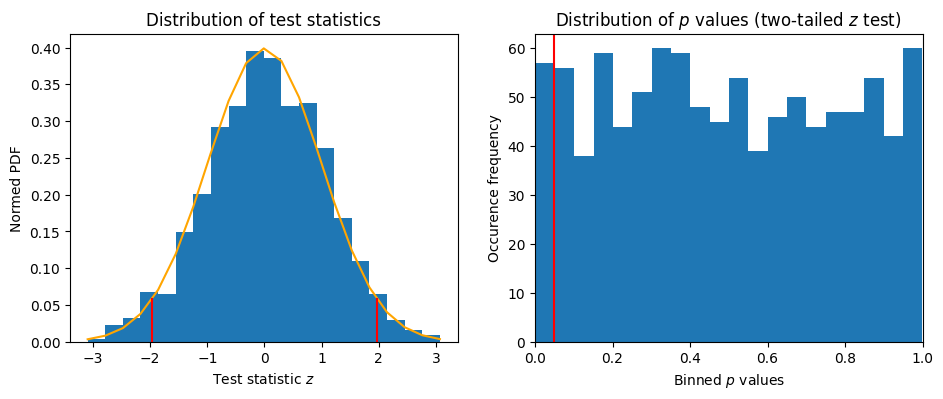

In [18]:
### Define the true parameters of the underlying normal distribution.
TrueMean = 3
TrueStd = 5
### Initialize arrays to store statistics of the ensemble of samples.
N = SampleSize = 100
NumSamples = 1000
SampleMeanArr = np.zeros(NumSamples)
TestStatArr = np.zeros(NumSamples)
ProbValArr = np.zeros(NumSamples)
### Create arrays with sample statistics and test statistics.
for k in range(NumSamples):
    data = stats.norm.rvs(loc=TrueMean, scale=TrueStd, size=SampleSize)
    SampleMeanArr[k] = np.mean(data)
    TestStatArr[k] = (SampleMeanArr[k]-TrueMean) / (TrueStd/np.sqrt(SampleSize))
    ProbValArr[k] = 2*stats.norm.cdf(-np.abs(TestStatArr[k]))
### Open plot figure.
plt.figure(figsize=(11, 4))
### Plot distribution of test statistics.
plt.subplot(1, 2, 1)
epdf, bins, pats = plt.hist(TestStatArr, 20, density=True)
plt.plot(bins, stats.norm.pdf(bins), color='orange')
plt.title('Distribution of test statistics')
plt.xlabel(r'Test statistic $z$')
plt.ylabel('Normed PDF')
zCrit = stats.norm.ppf(alpha/2)
plt.plot([zCrit, zCrit], [0, stats.norm.pdf(zCrit)], color='red')
plt.plot([-zCrit, -zCrit], [0, stats.norm.pdf(-zCrit)], color='red')
### Plot distribution of probability values.
plt.subplot(1, 2, 2)
plt.hist(ProbValArr, 20)
ylimits = plt.gca().get_ylim()
plt.plot([alpha, alpha], ylimits, color='red')
plt.xlim([0, 1])
plt.ylim(ylimits)
plt.title(r'Distribution of $p$ values (two-tailed $z$ test)')
plt.xlabel('Binned $p$ values')
plt.ylabel('Occurence frequency');

The left diagram shows the empirical (blue histogram) and theoretical (orange line) distributions of the test statistic $z$. The two rejection regions are marked by two vertical red lines. The right diagram displays the (supposedly uniform) empirical distribution of $p$ values. Here the vertical red line gives the signficance level. The region to the left of the red line contains the cases where the sample means are so extreme that the resulting $p$ values are below the pre-selected significance level $\alpha$, and the null hypothesis $H_0$ is erroneously rejected (population of false positives).

### Exercise: $z$ test

Repeat the procedure using random variates from a standard uniform distribution on the interval $[0,1]$. Note the mean is $\mu=\frac{1}{2}$, and the variance is $\sigma^2 = \frac{1}{12}$.

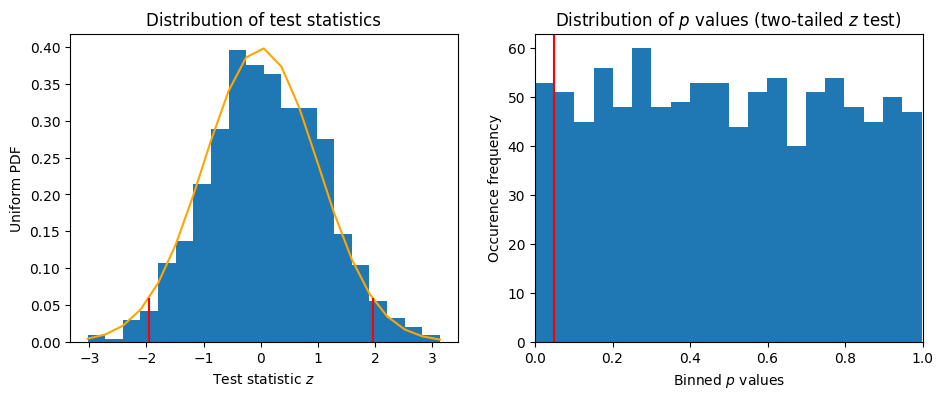

In [20]:
### Define the true parameters of the underlying normal distribution.
TrueMean = 0.5
TrueStd = 1/np.sqrt(12)
### Initialize arrays to store statistics of the ensemble of samples.
N = SampleSize = 100
NumSamples = 1000
SampleMeanArr = np.zeros(NumSamples)
TestStatArr = np.zeros(NumSamples)
ProbValArr = np.zeros(NumSamples)
### Create arrays with sample statistics and test statistics.
for k in range(NumSamples):
    data = stats.uniform.rvs(size=SampleSize)
    SampleMeanArr[k] = np.mean(data)
    TestStatArr[k] = (SampleMeanArr[k]-TrueMean) / (TrueStd/np.sqrt(SampleSize))
    ProbValArr[k] = 2*stats.norm.cdf(-np.abs(TestStatArr[k]))
### Open plot figure.
plt.figure(figsize=(11, 4))
### Plot distribution of test statistics.
plt.subplot(1, 2, 1)
epdf, bins, pats = plt.hist(TestStatArr, 20, density=True)
plt.plot(bins, stats.norm.pdf(bins), color='orange')
plt.title('Distribution of test statistics')
plt.xlabel(r'Test statistic $z$')
plt.ylabel('Uniform PDF')
zCrit = stats.norm.ppf(alpha/2)
plt.plot([zCrit, zCrit], [0, stats.norm.pdf(zCrit)], color='red')
plt.plot([-zCrit, -zCrit], [0, stats.norm.pdf(-zCrit)], color='red')
### Plot distribution of probability values.
plt.subplot(1, 2, 2)
plt.hist(ProbValArr, 20)
ylimits = plt.gca().get_ylim()
plt.plot([alpha, alpha], ylimits, color='red')
plt.xlim([0, 1])
plt.ylim(ylimits)
plt.title(r'Distribution of $p$ values (two-tailed $z$ test)')
plt.xlabel('Binned $p$ values')
plt.ylabel('Occurence frequency');

### Student's $t$ test

This category summarizes statistical hypothesis tests where under the null hypothesis $H_0$, the test statistic 
$$
T \, = \, \frac{\bar{u}-\mu}{\sigma/\sqrt{N}}
$$
follows a Student's $t$ distribution, e.g., when the sample mean $\bar{u}$ is compared with the known true mean $\mu$ but the standard deviation is unknown, and the sample size $N$ is small. Under the null hypothesis $H_0$ it is assumed that the sample mean $\bar{u}$ does not show a significant difference from the true mean $\mu$.

To demonstrate this test, we repeat the numerical $z$ test exercise with a small sample size. 

In [21]:
### Define the true parameters of the underlying normal distribution.
TrueMean = 3
print('True mean           : {:3f}'.format(TrueMean))
TrueStd = 5
### Obtain a sample drawn from the underlying normal distribution.
N = SampleSize = 10
print('Sample size         : {}'.format(SampleSize))
data = stats.norm.rvs(loc=TrueMean, scale=TrueStd, size=SampleSize)
### Compute sample statistics.
SampleMean = np.mean(data)
SampleStd = np.std(data, ddof=1)
print('Sample mean         : {:3f}'.format(SampleMean))
print('Sample std          : {:3f}'.format(SampleStd))
### Compute test statistic.
TestStat = (SampleMean-TrueMean) / (SampleStd/np.sqrt(SampleSize))
### Compute the probability value (p value).
ProbVal = 2*stats.t.cdf(-np.abs(TestStat), df=SampleSize-1)
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
### Check how the p value compares with the significance level alpha.
if ProbVal >= alpha:
    print('No significant difference between sample mean and true mean.')
else:
    print('Statistically significant difference between sample mean and true mean.')

True mean           : 3.000000
Sample size         : 10
Sample mean         : 2.044835
Sample std          : 6.200499
* Test statistic    : -0.487137
* Probability value : 0.637806
No significant difference between sample mean and true mean.


This test is implemented in the function ``ttest_1samp()`` of the ``scipy.stats`` module. 

In [22]:
### Compute the test statistic and the probability value (p value).
TestStat, ProbVal = stats.ttest_1samp(data, TrueMean)
print('Test statistic    : {:3f}'.format(TestStat))
print('Probability value : {:3f}'.format(ProbVal))

Test statistic    : -0.487137
Probability value : 0.637806


### Exercise: Two-sample $t$ test

Consult the literature on the two-sample $t$ test, and then the documentation of ``scipy.stats.ttest_ind()`` to learn how the test is implemented. Following the examples above, generate two samples of random variates and demonstrate the usage of the function ``ttest_ind()``.

In [27]:
TrueMean1 = TrueMean2 = 3
print('True mean           : {:3f}'.format(TrueMean))
TrueStd1 =TrueStd2= 5
### Obtain a sample drawn from the underlying normal distribution.
N = SampleSize = 10
print('Sample size         : {}'.format(SampleSize))
data1 = stats.norm.rvs(loc=TrueMean1, scale=TrueStd1, size=SampleSize)
### Compute sample statistics.
SampleMean1 = np.mean(data1)
print('Sample mean   1      : {:3f}'.format(SampleMean1))
data2 = stats.norm.rvs(loc=TrueMean1, scale=TrueStd1, size=SampleSize)
### Compute sample statistics.
SampleMean2 = np.mean(data2)
print('Sample mean   2      : {:3f}'.format(SampleMean2))
TestStat, ProbVal = stats.ttest_ind(data1,data2)
print('* Test statistic : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
### Check how the p value compares with the significance level alpha.
if ProbVal >= alpha:
    print('No significant difference between the sample means.')
else:
    print('Significant difference between the sample means.')

True mean           : 3.000000
Sample size         : 10
Sample mean   1      : 3.674172
Sample mean   2      : 1.269513
* Test statistic : 1.195265
* Probability value : 0.247494
No significant difference between the sample means.


## Double-checking the normality assumption

Many statistical applications rest on normally distributed random variables. This section presents statistical tests as well as graphical means to double-check the normality assumption.

### Normality tests

Several normality tests are implemented in ``scipy.stats``. D'Agostino's $K^2$ test is based on the sample skewness and the sample kurtosis. In the Anderson-Darling test, the test statistic is constructed using the empirical CDF. The Shapiro-Wilk test is related to the normal Q-Q (quantile-quantile) plot, see below.

In [29]:
N = SampleSize = 100
print('Sample size         : {}'.format(SampleSize))
#.. Generate a sample drawn from a normal distribution.
data1 = stats.norm.rvs(size=SampleSize)
TestStat,ProbVal = stats.shapiro(data1)
print('\nFirst sample (normal distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')
#.. Generate a sample drawn from a uniform distribution.
data2 = stats.uniform.rvs(size=SampleSize)
TestStat,ProbVal = stats.shapiro(data2)
print('\nSecond sample (uniform distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')

Sample size         : 100

First sample (normal distribution)
* Test statistic    : 0.991044
* Probability value : 0.748486
No support for rejecting the normality hypothesis.

Second sample (uniform distribution)
* Test statistic    : 0.948671
* Probability value : 0.000679
Reject the normality hypothesis.


### Exercise: Normality tests

Repeat this exercise using D'Agostino's $K^2$ test as implemented in `scipy.stats.normaltest()`.

In [30]:
N = SampleSize = 100
print('Sample size         : {}'.format(SampleSize))
#.. Generate a sample drawn from a normal distribution.
data1 = stats.norm.rvs(size=SampleSize)
TestStat,ProbVal = stats.normaltest(data1)
print('\nFirst sample (normal distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')
#.. Generate a sample drawn from a uniform distribution.
data2 = stats.uniform.rvs(size=SampleSize)
TestStat,ProbVal = stats.normaltest(data2)
print('\nSecond sample (uniform distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')

Sample size         : 100

First sample (normal distribution)
* Test statistic    : 0.004181
* Probability value : 0.997912
No support for rejecting the normality hypothesis.

Second sample (uniform distribution)
* Test statistic    : 55.983184
* Probability value : 0.000000
Reject the normality hypothesis.


### Normal probability plot

A graphical means to check normality is the normal probability (Q-Q, quantile-quantile) plot. See the documentation on the function `probplot()` for further information.

Sample size         : 100


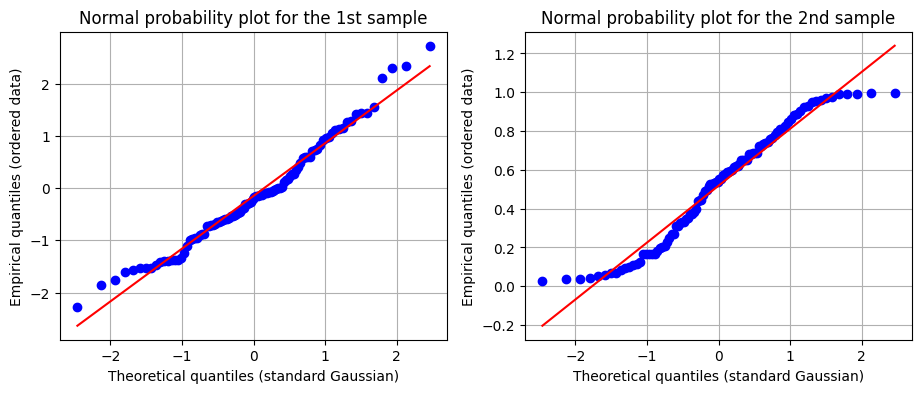

In [31]:
N = SampleSize = 100
print('Sample size         : {}'.format(SampleSize))
### Generate a sample drawn from a normal distribution.
data1 = stats.norm.rvs(size=SampleSize)
### Generate a sample drawn from a uniform distribution.
data2 = stats.uniform.rvs(size=SampleSize)
### Open plot figure
plt.figure(figsize=(11, 4))
### Normal probability plot for the first sample.
plt.subplot(1, 2, 1)
stats.probplot(data1, plot=plt, fit=True)
plt.title('Normal probability plot for the 1st sample')
plt.xlabel('Theoretical quantiles (standard Gaussian)')
plt.ylabel('Empirical quantiles (ordered data)')
plt.grid()
### Normal probability plot for the second sample.
plt.subplot(1, 2, 2)
stats.probplot(data2, plot=plt, fit=True)
plt.title('Normal probability plot for the 2nd sample')
plt.xlabel('Theoretical quantiles (standard Gaussian)')
plt.ylabel('Empirical quantiles (ordered data)')
plt.grid()

The linear pattern in the normal probability plot on the left offers strong evidence for the normality hypothesis, and the linear correlation coefficient is very close to one. The intercept of the regression line gives an estimate of the mean, and the slope an estimate of the standard deviation. In the diagram on the right, the probability plot displays a nonlinear pattern, particularly away from the center, with the first few points above the line and the last few points below the line (S-shaped pattern), indicative of a symmetric distribution with short tails.

### Exercise: Normal probability plot

Consult the section [Normal Probability Plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprp1.htm) of the online [NIST/SEMATECH e-Handbook of Statistical Methods](http://www.itl.nist.gov/div898/handbook/) to learn how to interpret normal probability plots.

---
---

## Solutions

### Solution: Confidence interval for the mean

In [ ]:
### Define sample parameters.
N = SampleSize = 30
SampleMean = 7.5
SampleStd = 1.7
### Define significence level alpha.
alpha = 0.05
print('alpha      : {:.2f}'.format(alpha))
### Compute confidence level gamma.
gamma = 1 - alpha
print('gamma      : {:.2f}'.format(gamma))
### Estimation using Student's t distribution.
print("\nEstimation using Student's t distribution")
tValue = stats.t.ppf(1-0.5*alpha, N-1)
print('* t-value    : {:.2f}'.format(tValue))
HWci = tValue*SampleStd/np.sqrt(N)
print('* Half-width : {:.2f}'.format(HWci))
LBci, RBci = SampleMean-HWci, SampleMean+HWci
print('* Conf. int. : [{:.2f},{:.2f}]'.format(LBci, RBci))
### Estimation using normal theory statistics.
print("\nEstimation using normal theory statistics")
zScore = stats.norm.ppf(1-0.5*alpha)
print('* z-score    : {:.2f}'.format(zScore))
HWci = zScore*SampleStd/np.sqrt(N)
print('* Half-width : {:.2f}'.format(HWci))
LBci, RBci = SampleMean-HWci, SampleMean+HWci
print('* Conf. int. : [{:.2f},{:.2f}]'.format(LBci, RBci))

### Solution: $z$ test

In [ ]:
### Define the true parameters of the underlying uniform distribution.
TrueMean = 0.5
TrueStd = 1/np.sqrt(12)
### Initialize arrays to store statistics of the ensemble of samples.
N = SampleSize = 100
NumSamples = 1000
SampleMeanArr = np.zeros(NumSamples)
TestStatArr = np.zeros(NumSamples)
ProbValArr = np.zeros(NumSamples)
### Create arrays with sample statistics and test statistics.
for k in range(NumSamples):
    data = stats.uniform.rvs(size=SampleSize)
    SampleMeanArr[k] = np.mean(data)
    TestStatArr[k] = (SampleMeanArr[k]-TrueMean) / (TrueStd/np.sqrt(SampleSize))
    ProbValArr[k] = 2*stats.norm.cdf(-np.abs(TestStatArr[k]))
### Open plot figure.
plt.figure(figsize=(11, 4))
### Plot distribution of test statistics.
plt.subplot(1, 2, 1)
epdf, bins, pats = plt.hist(TestStatArr, 20, density=True)
plt.plot(bins, stats.norm.pdf(bins), color='orange')
plt.title('Distribution of test statistics')
plt.xlabel(r'Test statistic $z$')
plt.ylabel('Normed PDF')
zCrit = stats.norm.ppf(alpha/2)
plt.plot([zCrit, zCrit], [0, stats.norm.pdf(zCrit)], color='red')
plt.plot([-zCrit, -zCrit],[0, stats.norm.pdf(-zCrit)], color='red')
### Plot distribution of probability values.
plt.subplot(1, 2, 2)
plt.hist(ProbValArr, 20)
ylimits = plt.gca().get_ylim()
plt.plot([alpha, alpha], ylimits, color='red')
plt.xlim([0, 1])
plt.ylim(ylimits)
plt.title(r'Distribution of $p$ values (two-tailed $z$ test)')
plt.xlabel('Binned $p$ values')
plt.ylabel('Occurence frequency');

### Solution: Two-sample $t$ test

In [ ]:
### Define the true parameters of the underlying normal distributions.
TrueMean1 = 3
print('True mean (1)     : {:3f}'.format(TrueMean1))
TrueStd1 = 5
TrueMean2 = TrueMean1
print('True mean (2)     : {:3f}'.format(TrueMean2))
TrueStd2 = TrueStd1
### Obtain two samples drawn from the underlying normal distributions.
N = SampleSize = 10
print('Sample size       : {}'.format(SampleSize))
data1 = stats.norm.rvs(loc=TrueMean1, scale=TrueStd1, size=SampleSize)
SampleMean1 = np.mean(data1)
print('Sample mean (1)   : {:3f}'.format(SampleMean1))
data2 = stats.norm.rvs(loc=TrueMean2, scale=TrueStd2, size=SampleSize)
SampleMean2 = np.mean(data2)
print('Sample mean (2)   : {:3f}'.format(SampleMean2))
### Compute the test statistic and the probability value (p value).
TestStat, ProbVal = stats.ttest_ind(data1, data2)
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
### Check how the p value compares with the significance level alpha.
if ProbVal >= alpha:
    print('No significant difference between the sample means.')
else:
    print('Significant difference between the sample means.')

### Solution: Normality tests

In [ ]:
N = SampleSize = 100
print('Sample size         : {}'.format(SampleSize))
#.. Generate a sample drawn from a normal distribution.
data1 = stats.norm.rvs(size=SampleSize)
TestStat,ProbVal = stats.normaltest(data1)
print('\nFirst sample (normal distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')
#.. Generate a sample drawn from a uniform distribution.
data2 = stats.uniform.rvs(size=SampleSize)
TestStat, ProbVal = stats.normaltest(data2)
print('\nSecond sample (uniform distribution)')
print('* Test statistic    : {:3f}'.format(TestStat))
print('* Probability value : {:3f}'.format(ProbVal))
if ProbVal >= alpha:
    print('No support for rejecting the normality hypothesis.')
else:
    print('Reject the normality hypothesis.')

---
---